In [138]:
import pandas as pd
from itertools import combinations
import math
import numpy as np
import statistics
from itertools import permutations
from bioinfokit import analys, visuz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
from matplotlib_venn import venn2
import copy
import random
from vst_function import *
from stattools.resampling import PermutationTest

In [213]:
#Africa
africa = pd.read_csv('../data/rawcounts_africa.csv').drop(columns=['Name', 'Description'])
africa = africa.T
africa['region'] = 'Africa'

#America
america = pd.read_csv('../data/rawcounts_america.csv').drop(columns=['Name', 'Description'])
america = america.T
america['region'] = 'America'

#Central Asia
centralasia = pd.read_csv('../data/rawcounts_centralasia.csv').drop(columns=['Name', 'Description'])
centralasia = centralasia.T
centralasia['region'] = 'CentralAsia'

#East Asia
eastasia = pd.read_csv('../data/rawcounts_eastasia.csv').drop(columns=['Name', 'Description'])
eastasia = eastasia.T
eastasia['region'] = 'EastAsia'

#SouthAsia
southasia = pd.read_csv('../data/rawcounts_southasia.csv').drop(columns=['Name', 'Description'])
southasia = southasia.T
southasia['region'] = 'SouthAsia'

#Gene anotation
genes = pd.read_csv('../data/rawcounts_africa.csv')
genes = genes.iloc[:,1:2]

In [214]:
genes

,Description
0,DDX11L1
1,WASH7P
2,MIR6859-1
3,MIR1302-2HG
4,MIR1302-2
...,...
58098,ERCC-00164
58099,ERCC-00165
58100,ERCC-00168
58101,ERCC-00170


In [149]:
d= pd.read_csv("vst_574_candidates_gene_anotation.csv")
d.sort_values(by=['chr','start'])

,chr,start,end,genes,WestEurasia.SouthAsia,WestEurasia.Africa,WestEurasia.CentralAsiaSiberia,WestEurasia.Oceania,WestEurasia.America,WestEurasia.EastAsia,...,Africa.CentralAsiaSiberia,Africa.Oceania,Africa.America,Africa.EastAsia,CentralAsiaSiberia.Oceania,CentralAsiaSiberia.America,CentralAsiaSiberia.EastAsia,Oceania.America,Oceania.EastAsia,America.EastAsia
26,1,9845436,9863387,CLSTN1,0.0,0.0,0.00000,0.00000,0.26365,0.00000,...,0.00000,0.00000,0.32252,0.00000,0.00000,0.00000,0.0,0.21695,0.00000,0.00000
3,1,13725296,13733660,PRAMEF20,0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.23619,0.23093,0.00000,0.35185,0.34632,0.0,0.00000,0.00000,0.00000
21,1,62112538,62120128,MGC34796,0.0,0.0,0.00000,0.00000,0.23412,0.00000,...,0.00000,0.00000,0.39356,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
22,1,62620869,62625863,PATJ,0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.35096,0.00000,0.00000,0.00000,0.0,0.35439,0.00000,0.35764
23,1,62642084,62656768,PATJ,0.0,0.0,0.33042,0.44138,0.31196,0.23015,...,0.35576,0.46692,0.34804,0.22823,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,X,134841737,134900920,"CT45A3, CT45A1, CT45A2",0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.20514,0.00000,0.48622,0.00000,0.0,0.57023,0.00000,0.20363
245,X,134841737,134975246,"CT45A3, CT45A5, CT45A6, CT45A1, CT45A2",0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.26678,0.00000,0.0,0.35572,0.00000,0.00000
246,X,146360192,146369374,"MIR514A1, MIR514A2",0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.34919,0.00000,0.00000
247,X,154788811,154840186,TMLHE,0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.30299,0.00000,0.0,0.24022,0.25329,0.00000


In [150]:
d = d.set_index(['genes'])
d

,chr,start,end,WestEurasia.SouthAsia,WestEurasia.Africa,WestEurasia.CentralAsiaSiberia,WestEurasia.Oceania,WestEurasia.America,WestEurasia.EastAsia,SouthAsia.Africa,...,Africa.CentralAsiaSiberia,Africa.Oceania,Africa.America,Africa.EastAsia,CentralAsiaSiberia.Oceania,CentralAsiaSiberia.America,CentralAsiaSiberia.EastAsia,Oceania.America,Oceania.EastAsia,America.EastAsia
genes,,,,,,,,,,,,,,,,,,,,,
SLC25A24,1,108729310,108737787,0.0,0.00000,0.0,0.00000,0.0,0.0,0.34330,...,0.0000,0.28019,0.50669,0.25098,0.00000,0.25789,0.0,0.00000,0.00000,0.00000
WDR47,1,109573089,109580939,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.00000,0.21935,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
"GSTM1, GSTM2, GSTM5",1,110215300,110257943,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.22606,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
PRAMEF20,1,13725296,13733660,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.23619,0.23093,0.00000,0.35185,0.34632,0.0,0.00000,0.00000,0.00000
"NBPF20, NA",1,144452805,144456917,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMLHE,X,154789310,154826421,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.30299,0.00000,0.0,0.24022,0.25329,0.00000
DMD,X,31529162,31554252,0.0,0.00000,0.0,0.33203,0.0,0.0,0.00000,...,0.0000,0.34625,0.00000,0.00000,0.30655,0.00000,0.0,0.31123,0.31376,0.00000
DMD,X,32986310,32990011,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.00000,0.32756,0.00000,0.00000,0.00000,0.0,0.36857,0.00000,0.20537


In [151]:
## Merging raw counts
regions = pd.concat([africa,america,centralasia, eastasia,southasia])
#regions = regions.set_index('region')
expr_df = regions
anotation = regions['region']
expr_df = expr_df.drop(columns =['region'])
expr_df = expr_df.T
print(expr_df.shape)

### 

## Filter out non-expressed genes

expr_df = expr_df.loc[expr_df.sum(axis=1) > 0, :]
print(expr_df.shape)

## Filter out lowly expressed genes
mask_low_vals = (expr_df > 0.3).sum(axis=1) > 2
expr_df = expr_df.loc[mask_low_vals, :]

print(expr_df.shape)


expr_df = expr_df.T
expr_df.insert(0, 'region', anotation)
expr_df = pd.DataFrame(expr_df)
expr_df

(58103, 41)
(42453, 41)
(32795, 41)


,region,0,1,9,10,11,12,13,19,21,...,58001,58002,58003,58004,58005,58006,58007,58008,58009,58010
GSM1312724.Mbuti.rnaseqccounts,Africa,0,0,0,0,0,1,0,4,4,...,95274,1,0,0,19567,23477,7,58185,3,3
GSM1312719.Mbuti.rnaseqccounts,Africa,2,63,1,0,0,11,1,39,0,...,313088,0,0,1,106475,63479,2,117999,5,2
GSM1312732.Mozabite.rnaseqccounts,Africa,0,17,0,0,0,0,0,7,2,...,156280,0,0,0,58952,35626,3,68558,1,0
GSM1312722.Mbuti.rnaseqccounts,Africa,0,12,0,0,0,1,0,5,2,...,117133,1,1,0,47325,37962,10,65398,2,2
GSM1312731.Mozabite.rnaseqccounts,Africa,0,7,0,0,4,3,0,4,2,...,169830,1,0,0,44684,41467,6,98357,2,3
GSM1312730.Mozabite.rnaseqccounts,Africa,0,11,4,4,0,0,0,1,3,...,121071,0,0,0,40073,22114,2,60204,1,2
GSM1312725.Mbuti.rnaseqccounts,Africa,0,6,0,0,2,6,2,0,2,...,177779,3,0,0,59778,49825,6,90205,0,0
GSM1312729.Mozabite.rnaseqccounts,Africa,0,42,0,0,0,2,0,43,14,...,297302,2,0,1,85070,53393,5,146046,3,2
GSM1312728.Mozabite.rnaseqccounts,Africa,0,10,2,2,0,1,0,9,2,...,135369,2,0,2,53905,34618,5,53172,1,1
GSM1312723.Mbuti.rnaseqccounts,Africa,0,70,3,0,8,190,63,35,10,...,490641,0,0,0,161058,60918,4,205312,3,3


# Subset the expression DataFrame using top 800 genes with largest variance
### Not running right know

variances = np.var(expr_df, axis=1)
srt_idx = variances.argsort()[::-1]
expr_df_sub = expr_df.iloc[srt_idx].iloc[:800]
print(expr_df_sub.shape)

expr_df_sub = expr_df_sub.T
expr_df_sub.insert(0, 'region', anotation)
expr_df_sub = pd.DataFrame(expr_df_sub)
expr_df_sub


In [152]:
####### Groupby regions #######
dt_group = expr_df.groupby('region')

dt_groupped = []
regions = expr_df['region'].unique()
for i in regions:
    dt_groupped.append(dt_group.get_group(str(i)))
    

#### Names to pair-population
regions = expr_df['region'].unique()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])
    


In [153]:
## VST for pair-population
vst_dt = []

combination_regions = list(combinations([0,1,2,3,4],2))
for pair in combination_regions:
        statistic = vst((dt_groupped[pair[0]]), (dt_groupped[pair[1]]))
        vst_dt.append(statistic)

vst_dt = pd.DataFrame(vst_dt).set_axis(combination_names)
vst_dt = vst_dt.T
vst_dt 

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.071429,0.071429,0.047619,0.047619,NaN,0.142857,0.142857,0.142857,0.142857,0.071429
1,0.065381,0.086217,0.056645,0.057729,0.093065,0.074573,0.073271,0.104534,0.098287,0.071524
9,0.105121,0.131429,0.061080,0.151045,0.142857,0.126050,0.227409,0.204082,0.238634,0.192439
10,0.092262,0.090267,0.051948,0.084997,NaN,0.142857,0.164870,0.142857,0.163335,0.122387
11,0.048798,0.050000,0.052165,0.220033,0.078571,0.075483,0.270291,0.083056,0.226804,0.281260
...,...,...,...,...,...,...,...,...,...,...
58006,0.047672,0.058648,0.064242,0.048450,0.086255,0.089796,0.071987,0.117941,0.082264,0.094770
58007,0.052833,0.056901,0.064426,0.080179,0.098000,0.074998,0.139992,0.111187,0.083183,0.152369
58008,0.087061,0.051970,0.047723,0.064104,0.157427,0.128103,0.075373,0.078887,0.112335,0.094222
58009,0.052859,0.075966,0.047619,0.218911,0.109553,0.076394,0.221332,0.100663,0.095137,0.261710


In [158]:
gene_names = genes.iloc[vst_dt.index]
vst_dt_annotated = vst_dt.set_index(gene_names['Description'])
vst_dt_annotated

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
Description,,,,,,,,,,
DDX11L1,0.071429,0.071429,0.047619,0.047619,NaN,0.142857,0.142857,0.142857,0.142857,0.071429
WASH7P,0.065381,0.086217,0.056645,0.057729,0.093065,0.074573,0.073271,0.104534,0.098287,0.071524
AL627309.1,0.105121,0.131429,0.061080,0.151045,0.142857,0.126050,0.227409,0.204082,0.238634,0.192439
AL627309.3,0.092262,0.090267,0.051948,0.084997,NaN,0.142857,0.164870,0.142857,0.163335,0.122387
CICP27,0.048798,0.050000,0.052165,0.220033,0.078571,0.075483,0.270291,0.083056,0.226804,0.281260
...,...,...,...,...,...,...,...,...,...,...
MT-ND6,0.047672,0.058648,0.064242,0.048450,0.086255,0.089796,0.071987,0.117941,0.082264,0.094770
MT-TE,0.052833,0.056901,0.064426,0.080179,0.098000,0.074998,0.139992,0.111187,0.083183,0.152369
MT-CYB,0.087061,0.051970,0.047723,0.064104,0.157427,0.128103,0.075373,0.078887,0.112335,0.094222


In [159]:
vst_dt_annotated.sort_values(by='Africa-America', ascending=False).head(50)

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
Description,,,,,,,,,,
AC005726.2,0.781848,0.204614,0.423325,0.048150,0.330337,0.074857,0.762090,0.177045,0.199580,0.379321
NOMO3,0.779114,0.290118,0.353945,0.049084,0.589785,0.271960,0.736243,0.163165,0.269568,0.312722
AC087276.2,0.772659,0.169062,0.499501,0.048083,0.543935,0.073807,0.776289,0.304031,0.175061,0.455722
AL133325.3,0.757216,0.279101,0.236071,0.393642,0.120000,0.359490,0.477992,0.113134,0.116332,0.071773
AC007780.1,0.746703,0.144805,0.445481,0.167599,0.265739,0.084018,0.830892,0.213729,0.245610,0.477120
PHC1P1,0.734999,0.115801,0.182957,0.047619,0.638316,0.333315,0.710586,0.128111,0.159664,0.181230
RF01891,0.718895,0.247742,0.418946,0.093326,0.220123,0.087107,0.677296,0.184679,0.197975,0.349804
AC046130.1,0.691983,0.050013,0.255211,0.158976,0.661425,0.139556,0.327334,0.232166,0.159259,0.099750
AC078777.1,0.691024,0.156592,0.507499,0.051284,0.582216,0.230080,0.655917,0.367647,0.246592,0.484316


<h1> Permutation

In [41]:
p_value_permutation = []

combination_regions = list(combinations([0,1,2,3,4],2))
for region in combination_regions:
    
    p_value= []
    p_value_permutation.append(p_value)
    for i in vst_dt.index:
        permutation = PermutationTest(dt_groupped[region[0]][i], dt_groupped[region[1]][i], stat=vst, n_perm=999)#mean_gt
        p_value.append(permutation.p_value())

/branchinecta/jbazanwilliamson/cnv_analysis/cnv_sgdp/scripts/vst_function.py:44: RuntimeWarning: invalid value encountered in double_scalars
  vst = (vt-vs)/vt


KeyboardInterrupt: 

In [160]:
permutation_df = pd.DataFrame(p_value_permutation)
permutation_df = permutation_df.set_axis(combination_names)
permutation_df = permutation_df.T
permutation_df = permutation_df.set_axis(vst_dt.index)
permutation_df 

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.713,0.939,0.899,1.000,0.001,0.285,1.000,1.000,1.000,1.000
1,0.536,0.432,0.696,0.669,0.652,0.865,0.882,0.648,0.657,0.978
9,0.376,0.286,0.620,0.125,1.000,0.654,0.012,0.310,0.048,0.180
10,0.647,0.648,0.873,0.485,0.001,0.268,0.088,1.000,0.350,0.480
11,0.970,1.000,0.856,0.079,0.926,0.909,0.068,0.872,0.177,0.092
...,...,...,...,...,...,...,...,...,...,...
58006,0.970,0.667,0.572,0.884,0.741,0.639,0.929,0.450,0.822,NaN
58007,0.815,0.745,0.564,0.476,0.698,0.808,0.328,0.543,0.745,NaN
58008,0.369,0.866,0.964,0.589,0.311,0.401,0.850,0.902,0.519,NaN
58009,0.834,0.509,0.976,0.069,0.506,0.925,0.185,0.759,0.661,NaN


In [194]:
boolean = (permutation_df.T <=0.05)


## Deleting columns where none of the regions passed the imputation
boolean = boolean.loc[:, boolean.any()]
boolean

,0,9,10,22,30,32,34,35,36,48,...,57978,57980,57984,57985,57986,57989,57990,57993,57994,58000
Africa-America,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,True,False,False,True,True
Africa-CentralAsia,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Africa-EastAsia,False,False,False,False,False,True,False,False,True,False,...,True,True,True,True,False,False,False,False,False,True
Africa-SouthAsia,False,False,False,False,True,True,False,False,False,False,...,False,False,False,True,False,False,True,True,False,False
America-CentralAsia,True,False,True,True,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
America-EastAsia,False,False,False,False,False,False,False,True,False,True,...,False,True,False,True,False,False,False,False,False,False
America-SouthAsia,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
CentralAsia-EastAsia,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,True
CentralAsia-SouthAsia,False,True,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
EastAsia-SouthAsia,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


<h1> Subsetting by vst > 0.2 and permutation p.value < 0.05

In [198]:
filtering_vst = pd.DataFrame(vst_dt.T)>=0.2
filtering_vst = filtering_vst.loc[:, filtering_vst.any()]
#filtering_vst = filtering_vst.set_axis(combination_names)
len(filtering_vst.T)
filtering_vst.T

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
9,False,False,False,False,False,False,True,True,True,False
11,False,False,False,True,False,False,True,False,True,True
12,False,False,False,False,False,False,False,False,True,False
19,False,False,False,False,False,False,False,False,True,False
21,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
58002,False,False,False,False,True,True,False,False,False,True
58003,False,False,False,False,False,False,False,True,False,False
58004,False,False,True,False,False,True,False,False,False,True
58005,True,False,False,False,True,False,True,True,False,True


In [199]:
vst_dt = vst_dt.replace(np.NaN, 0)
vst_dt


,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.071429,0.071429,0.047619,0.047619,0.000000,0.142857,0.142857,0.142857,0.142857,0.071429
1,0.065381,0.086217,0.056645,0.057729,0.093065,0.074573,0.073271,0.104534,0.098287,0.071524
9,0.105121,0.131429,0.061080,0.151045,0.142857,0.126050,0.227409,0.204082,0.238634,0.192439
10,0.092262,0.090267,0.051948,0.084997,0.000000,0.142857,0.164870,0.142857,0.163335,0.122387
11,0.048798,0.050000,0.052165,0.220033,0.078571,0.075483,0.270291,0.083056,0.226804,0.281260
...,...,...,...,...,...,...,...,...,...,...
58006,0.047672,0.058648,0.064242,0.048450,0.086255,0.089796,0.071987,0.117941,0.082264,0.094770
58007,0.052833,0.056901,0.064426,0.080179,0.098000,0.074998,0.139992,0.111187,0.083183,0.152369
58008,0.087061,0.051970,0.047723,0.064104,0.157427,0.128103,0.075373,0.078887,0.112335,0.094222
58009,0.052859,0.075966,0.047619,0.218911,0.109553,0.076394,0.221332,0.100663,0.095137,0.261710


In [200]:
passed_permut = (permutation_df <=0.05)
passed_permut = passed_permut.replace(True, np.NaN)
passed_permut 

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0
10,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
58006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
passed_permut[passed_permut.isnull()] = vst_dt

In [202]:
passed_permut

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.227409,0.0,0.238634,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
58006,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
58007,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
58008,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
58009,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [184]:
filtering = pd.DataFrame(passed_permut.T)>=0.2
filtering = filtering.loc[:, filtering.any()]
filtering = filtering.T
filtering

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
9,False,False,False,False,False,False,True,False,True,False
30,False,False,False,True,False,False,False,False,False,False
32,True,True,True,True,False,False,False,False,False,False
34,False,False,False,False,False,False,True,False,False,False
36,True,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
57989,True,False,False,False,False,False,False,False,False,False
57990,False,False,False,True,False,False,False,False,False,False
57993,False,False,False,True,False,False,False,False,True,False
57994,True,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Genes that passed permutation in any group(p-value <0.05)')

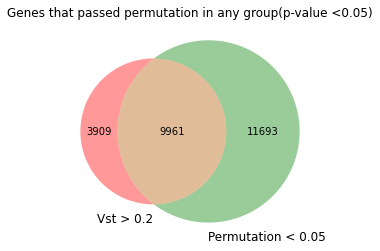

In [185]:
#PERMUTATION RESULTS
inner_per = len(filtering)
left_per = len(boolean.T) - inner_per
right_per = len(filtering_vst.T) -inner_per


venn2(subsets = (left_per, right_per, inner_per), set_labels = ('Vst > 0.2', 'Permutation < 0.05'))
plt.title('Genes that passed permutation in any group(p-value <0.05)')

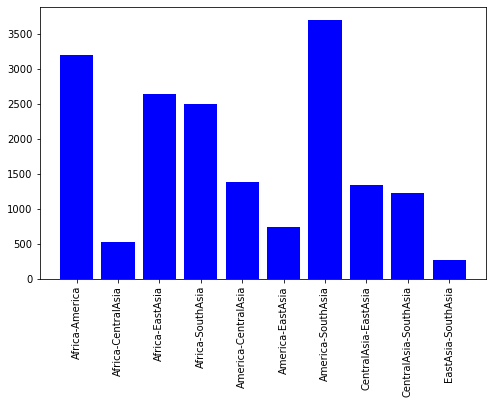

In [171]:
dist = filtering.T.sum()


fig = plt.figure(figsize = (8, 5))


#fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dist.index, dist, color ='blue')
 
#plt.xlabel("Pairwise combination")
#plt.ylabel("# of CNVs passed perrmutation")
#plt.title("CNVs that passed Vst(pair-group) and permutation", size=20)
plt.xticks(rotation=90)
plt.savefig('../plots/distribution_candidates_vst_rnaseq.png', transparent=True)
plt.show()


In [240]:
candidates = passed_permut.loc[filtering.index]
d

,chr,start,end,WestEurasia.SouthAsia,WestEurasia.Africa,WestEurasia.CentralAsiaSiberia,WestEurasia.Oceania,WestEurasia.America,WestEurasia.EastAsia,SouthAsia.Africa,...,Africa.CentralAsiaSiberia,Africa.Oceania,Africa.America,Africa.EastAsia,CentralAsiaSiberia.Oceania,CentralAsiaSiberia.America,CentralAsiaSiberia.EastAsia,Oceania.America,Oceania.EastAsia,America.EastAsia
genes,,,,,,,,,,,,,,,,,,,,,
SLC25A24,1,108729310,108737787,0.0,0.00000,0.0,0.00000,0.0,0.0,0.34330,...,0.0000,0.28019,0.50669,0.25098,0.00000,0.25789,0.0,0.00000,0.00000,0.00000
WDR47,1,109573089,109580939,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.00000,0.21935,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
"GSTM1, GSTM2, GSTM5",1,110215300,110257943,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.22606,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
PRAMEF20,1,13725296,13733660,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.23619,0.23093,0.00000,0.35185,0.34632,0.0,0.00000,0.00000,0.00000
"NBPF20, NA",1,144452805,144456917,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMLHE,X,154789310,154826421,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.30299,0.00000,0.0,0.24022,0.25329,0.00000
DMD,X,31529162,31554252,0.0,0.00000,0.0,0.33203,0.0,0.0,0.00000,...,0.0000,0.34625,0.00000,0.00000,0.30655,0.00000,0.0,0.31123,0.31376,0.00000
DMD,X,32986310,32990011,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,...,0.0000,0.00000,0.32756,0.00000,0.00000,0.00000,0.0,0.36857,0.00000,0.20537


In [262]:
candidates = genes.merge(candidates, left_index=True, right_index=True)
candidates = candidates.set_index('Description')
candidates

,Africa-America,Africa-CentralAsia,Africa-EastAsia,Africa-SouthAsia,America-CentralAsia,America-EastAsia,America-SouthAsia,CentralAsia-EastAsia,CentralAsia-SouthAsia,EastAsia-SouthAsia
Description,,,,,,,,,,
AL627309.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.227409,0.000000,0.238634,0.0
AL669831.3,0.000000,0.000000,0.000000,0.238876,0.000000,0.0,0.000000,0.000000,0.000000,0.0
MTND1P23,0.268473,0.252246,0.267888,0.268252,0.000000,0.0,0.000000,0.000000,0.000000,0.0
MTCO1P12,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.387513,0.000000,0.000000,0.0
MTCO2P12,0.369943,0.000000,0.247175,0.000000,0.377968,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
MT-CO1,0.258071,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
MT-TS1,0.000000,0.000000,0.000000,0.251082,0.000000,0.0,0.000000,0.000000,0.000000,0.0
MT-TK,0.000000,0.000000,0.000000,0.582665,0.000000,0.0,0.000000,0.000000,0.614767,0.0


In [371]:
overlaping = candidates.merge(d, left_index=True, right_index=True)
overlaping.sort_values(by=['Africa-America']).head()
overlaping_mean = overlaping.mean()
overlaping_mean[['Africa-America']]

Africa-America    0.097816
dtype: float64

In [372]:
overlaping[['Africa-America', 'Africa.America']]

,Africa-America,Africa.America
ABCA13,0.000000,0.36032
AKAP13,0.000000,0.00000
ANKRD28,0.261658,0.00000
ANO1,0.241908,0.57890
ANO3,0.000000,0.00000
...,...,...
WWTR1,0.000000,0.00000
ZBED4,0.274061,0.00000
ZNF28,0.366870,0.00000
ZNF385D,0.000000,0.00000


In [373]:
import scipy
#r, p = scipy.stats.pearsonr(overlaping[['Africa-America']], overlaping[['Africa.America']])
scipy.stats.spearmanr(overlaping[['Africa-America']], overlaping[['Africa.America']]).correlation 

0.15547805256191838

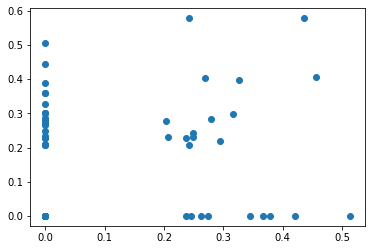

In [374]:
plt.scatter(overlaping[['Africa-America']], overlaping[['Africa.America']])
plt.show()

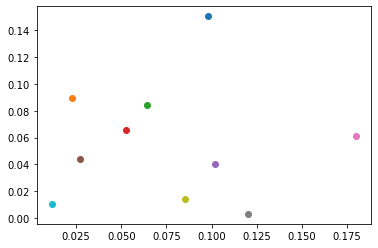

In [375]:
plt.scatter(overlaping_mean[['Africa-America']], overlaping_mean[['Africa.America']])
plt.scatter(overlaping_mean[['Africa-CentralAsia']], overlaping_mean[['Africa.CentralAsiaSiberia']])
plt.scatter(overlaping_mean[['Africa-EastAsia']], overlaping_mean[['Africa.EastAsia']])
plt.scatter(overlaping_mean[['Africa-SouthAsia']], overlaping_mean[['SouthAsia.Africa']])
plt.scatter(overlaping_mean[['America-CentralAsia']], overlaping_mean[['CentralAsiaSiberia.America']])
plt.scatter(overlaping_mean[['America-EastAsia']], overlaping_mean[['America.EastAsia']])
plt.scatter(overlaping_mean[['America-SouthAsia']], overlaping_mean[['SouthAsia.America']])
plt.scatter(overlaping_mean[['CentralAsia-EastAsia']], overlaping_mean[['CentralAsiaSiberia.EastAsia']])
plt.scatter(overlaping_mean[['CentralAsia-SouthAsia']], overlaping_mean[['SouthAsia.CentralAsiaSiberia']])
plt.scatter(overlaping_mean[['EastAsia-SouthAsia']], overlaping_mean[['SouthAsia.EastAsia']])


plt.show()

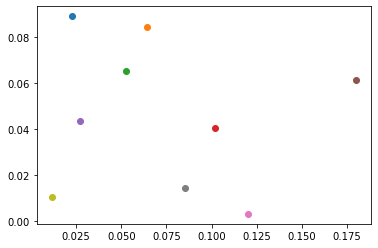

In [303]:
means_groupping = pd.DataFrame()
means_groupping['rnaseq'] = overlaping_mean[['Africa-America']]
means_groupping['cnv'] = overlaping_mean[['Africa.America']]

#means_groupping.append(overlaping_mean[['Africa-America']], overlaping_mean[['Africa.America']])
plt.scatter(overlaping_mean[['Africa-CentralAsia']], overlaping_mean[['Africa.CentralAsiaSiberia']])
plt.scatter(overlaping_mean[['Africa-EastAsia']], overlaping_mean[['Africa.EastAsia']])
plt.scatter(overlaping_mean[['Africa-SouthAsia']], overlaping_mean[['SouthAsia.Africa']])
plt.scatter(overlaping_mean[['America-CentralAsia']], overlaping_mean[['CentralAsiaSiberia.America']])
plt.scatter(overlaping_mean[['America-EastAsia']], overlaping_mean[['America.EastAsia']])
plt.scatter(overlaping_mean[['America-SouthAsia']], overlaping_mean[['SouthAsia.America']])
plt.scatter(overlaping_mean[['CentralAsia-EastAsia']], overlaping_mean[['CentralAsiaSiberia.EastAsia']])
plt.scatter(overlaping_mean[['CentralAsia-SouthAsia']], overlaping_mean[['SouthAsia.CentralAsiaSiberia']])
plt.scatter(overlaping_mean[['EastAsia-SouthAsia']], overlaping_mean[['SouthAsia.EastAsia']])



In [379]:
#means_groupping
cnv_mean = pd.DataFrame(overlaping_mean[18:33])
cnv_mean = cnv_mean.drop('SouthAsia.Oceania')
cnv_mean = cnv_mean.drop('Africa.Oceania')
cnv_mean = cnv_mean.drop('CentralAsiaSiberia.Oceania')
cnv_mean = cnv_mean.drop('Oceania.America')
cnv_mean = cnv_mean.drop('Oceania.EastAsia')
cnv_mean.sort_index()

,0
Africa.America,0.150473
Africa.CentralAsiaSiberia,0.089175
Africa.EastAsia,0.084354
America.EastAsia,0.043714
CentralAsiaSiberia.America,0.040482
CentralAsiaSiberia.EastAsia,0.003069
SouthAsia.Africa,0.065311
SouthAsia.America,0.061352
SouthAsia.CentralAsiaSiberia,0.014338
SouthAsia.EastAsia,0.010247


In [380]:
#means_groupping
rnaseq_mean = pd.DataFrame(overlaping_mean[0:10])
rnaseq_mean.sort_index()

,0
Africa-America,0.097816
Africa-CentralAsia,0.022396
Africa-EastAsia,0.064281
Africa-SouthAsia,0.052628
America-CentralAsia,0.101671
America-EastAsia,0.026945
America-SouthAsia,0.180147
CentralAsia-EastAsia,0.120064
CentralAsia-SouthAsia,0.085093
EastAsia-SouthAsia,0.011474


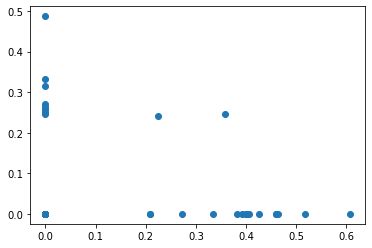

In [381]:
plt.scatter(overlaping[['America-CentralAsia']], overlaping[['CentralAsiaSiberia.America']])
plt.show()

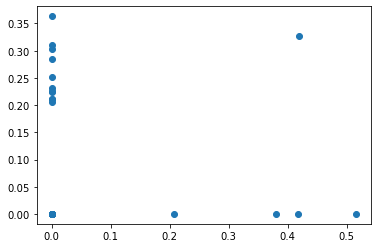

In [245]:
plt.scatter(overlaping[['America-EastAsia']], overlaping[['America.EastAsia']])
plt.show()

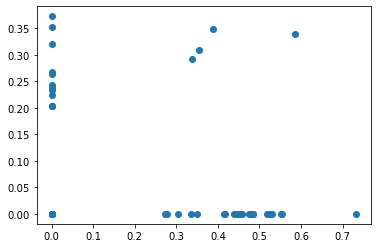

In [247]:
plt.scatter(overlaping[['America-SouthAsia']], overlaping[['SouthAsia.America']])
plt.show()

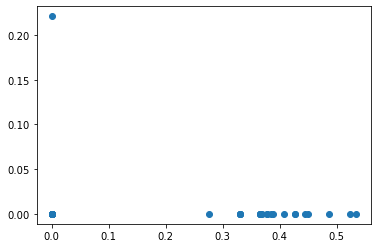

In [251]:
plt.scatter(overlaping[['CentralAsia-EastAsia']], overlaping[['CentralAsiaSiberia.EastAsia']])
plt.show()